The Dataset can be downloaded from<br>
https://www.kaggle.com/competitions/titanic/data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [10]:
titanicTraindf = pd.read_csv("C:/Users/Lenovo/Desktop/My Git Repo/DataScienceGuide/DataScienceGuide/DataSets/Titanic_Dataset/train.csv")
titanicTraindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [11]:
titanicTraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanicTraindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: title={'center': 'Survived Count'}, xlabel='Survived', ylabel='count'>

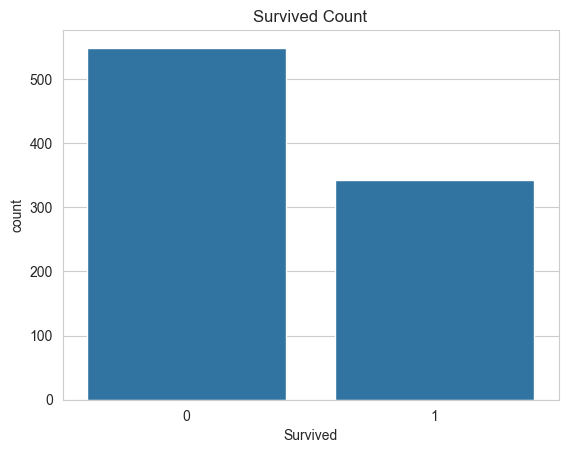

In [20]:
#Lets See How many Survivded
plt.title("Survived Count")
sns.countplot(x=titanicTraindf["Survived"])

<Axes: title={'center': 'Survived on Gender Basis'}, xlabel='Survived', ylabel='count'>

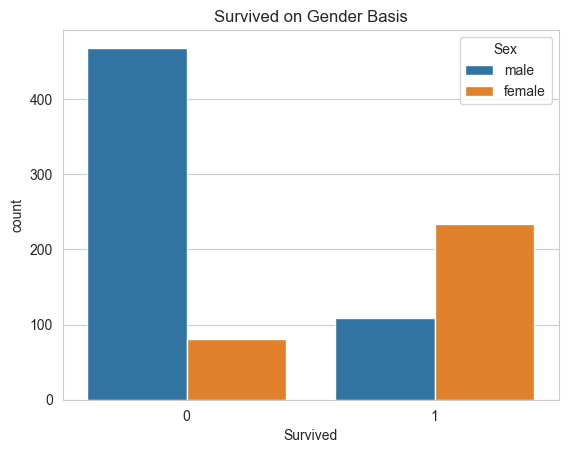

In [21]:
plt.title("Survived on Gender Basis")
sns.countplot(x=titanicTraindf["Survived"],hue=titanicTraindf["Sex"])

<Axes: title={'center': 'Survived on Gender Basis'}, xlabel='Survived', ylabel='count'>

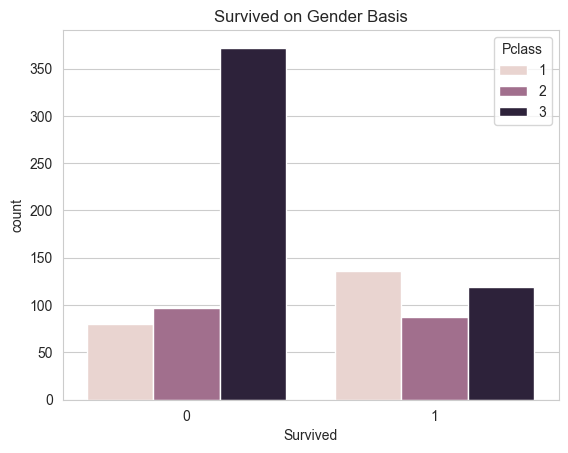

In [19]:
plt.title("Survived on Class Basis")
sns.countplot(x=titanicTraindf["Survived"],hue=titanicTraindf["Pclass"])

<Axes: title={'center': 'Class and from Where they Embarked on Titanic'}, xlabel='Embarked', ylabel='count'>

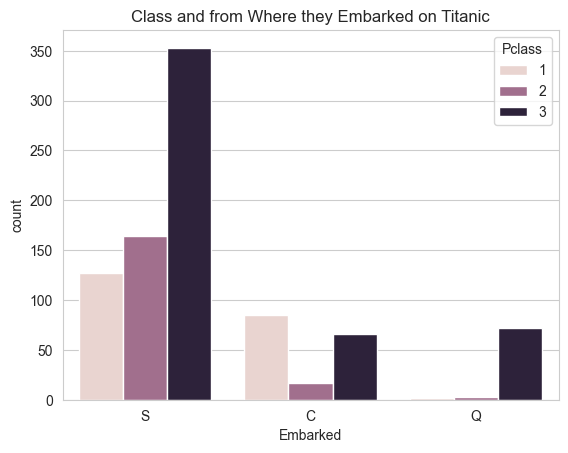

In [27]:
plt.title("Class and from Where they Embarked on Titanic")
sns.countplot(x=titanicTraindf["Embarked"],hue="Pclass",data=titanicTraindf)

<Axes: >

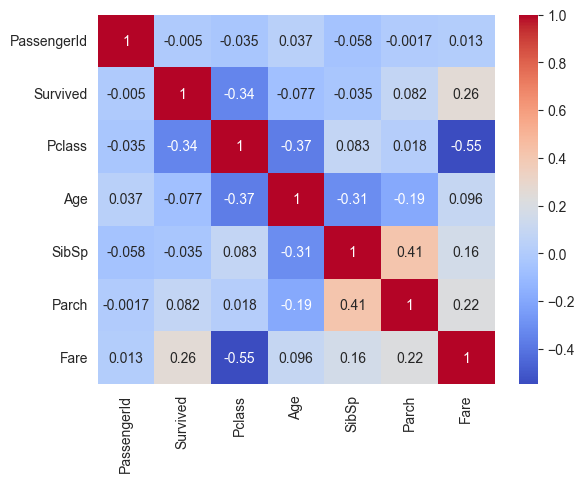

In [32]:
sns.heatmap(titanicTraindf.corr(),cmap="coolwarm",annot=True)

CountPlots are used for Categorical Variables whereas HistPlots are used for Continuous variables

<Axes: xlabel='Fare', ylabel='Count'>

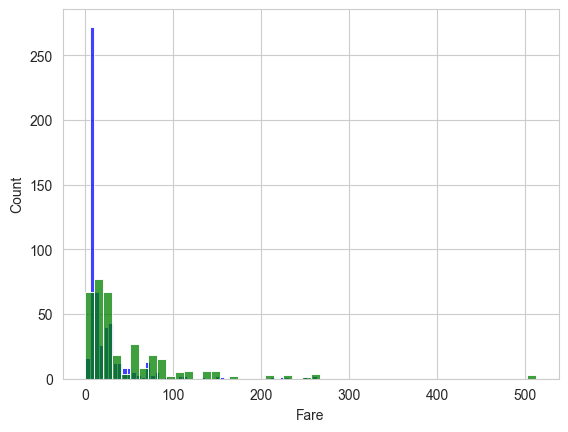

In [45]:
#sns.distplot(titanicTraindf["Fare"],hue=titanicTraindf["Survived"]) As Hue isn't supported
sns.histplot(titanicTraindf[titanicTraindf["Survived"]==0]["Fare"],color="blue",bins=50)
sns.histplot(titanicTraindf[titanicTraindf["Survived"]==1]["Fare"],color="green",bins=50)

### Transform Data & Feature Engineering

<Axes: >

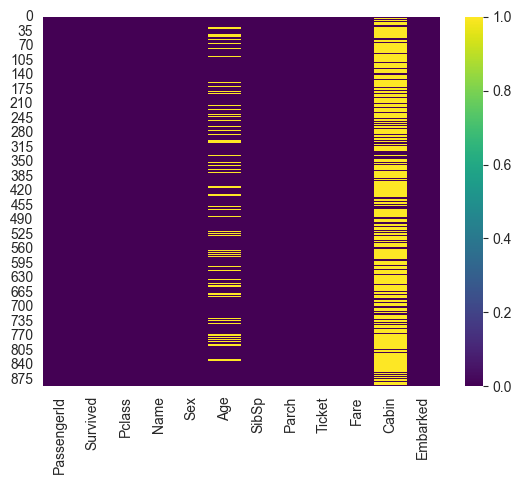

In [64]:
'''Now we know that Age has Nan values so let do something about it.
Either we can give mean value of age to every nan value or
we can do something more good,specific and see it accordinf to class wise.'''
sns.heatmap(titanicTraindf.isna(),cmap="viridis")

Text(0.5, 1.0, 'Box-Whisker of Age Column')

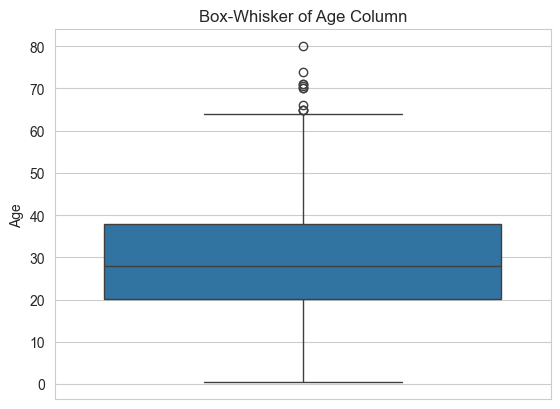

In [60]:
sns.boxplot(y=titanicTraindf["Age"]) #By Default Seaborn handles null Values
plt.title("Box-Whisker of Age Column")

Age Nan including Mean:  29.69911764705882


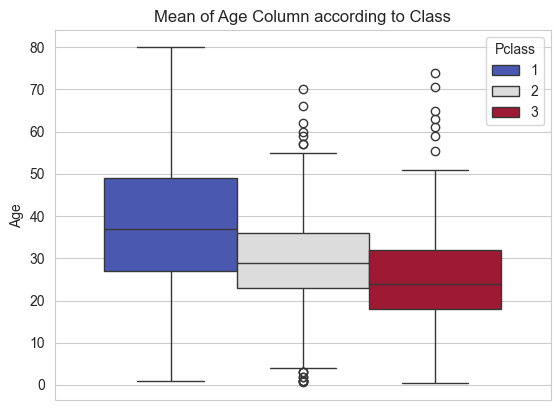

In [61]:
sns.boxplot(y=titanicTraindf["Age"],hue=titanicTraindf["Pclass"],palette="coolwarm") #By Default Seaborn handles null Values
plt.title("Mean of Age Column according to Class")
print("Age Nan including Mean: ",titanicTraindf["Age"].mean()) #Mean also excludes NAN values

In [62]:
def computeAge(col):
    Age = col[0]
    Class = col[1]
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class ==2:
            return 30
        elif Class ==3:
            return 23
    else:
        return Age

Text(0.5, 1.0, 'Age is Adjusted to Mean of PClass Category')

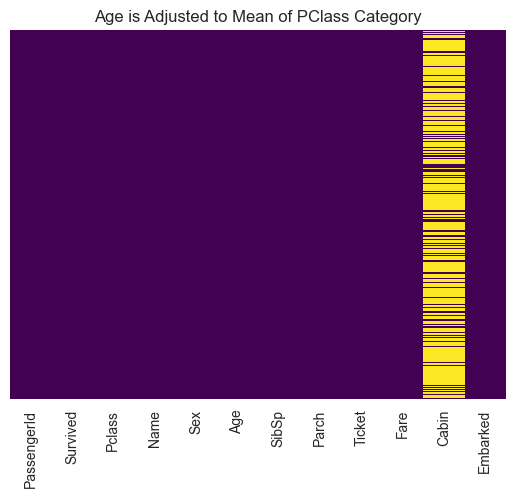

In [66]:
traindf['Age'] = traindf[['Age','Pclass']].apply(computeAge,axis=1)
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis',yticklabels=False) #For checking if done correctly
plt.title("Age is Adjusted to Mean of PClass Category")

In [67]:
traindf.drop(labels=["Cabin"],axis=1,inplace=True)

<Axes: >

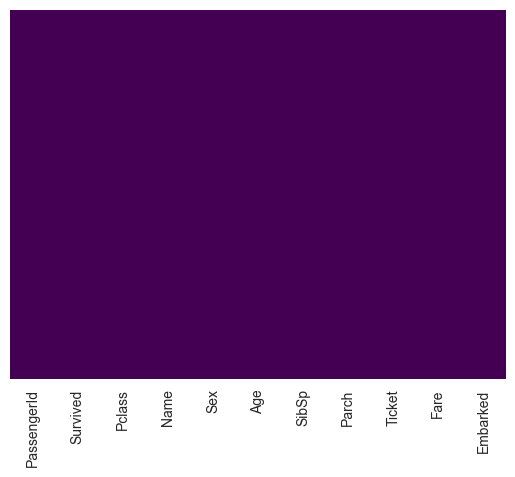

In [68]:
'''Now for Cabin column , it has so missing data we cant do anything about it. So drop it'''
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis',yticklabels=False) #For checking if done correctly

In [72]:
'''Now after cleaning lets move toward which columns to use and which not. We can put categorical data 
so we will make dummy values out of it
In the presence of multicollinearity, it becomes challenging to assess the individual impact of each independent variable on the dependent variable.''' 
print(pd.get_dummies(traindf['Sex']))
print(pd.get_dummies(traindf['Sex'],drop_first=True))

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]
     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [73]:
sex = pd.get_dummies(traindf['Sex'],drop_first=True)
embark = pd.get_dummies(traindf['Embarked'],drop_first=True)
traindf = pd.concat([traindf,sex,embark],axis=1)
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


In [74]:
'''Now drop columns which you dont need'''
traindf.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


### Model Building

In [76]:
'''Now Lets Separate Test and train data''' 
X_Data = traindf.drop('Survived',axis=1)
Y_Data = traindf['Survived']

In [77]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_Data,Y_Data,test_size=0.30,random_state=101)

 Logistic regression always uses the sigmoid (logistic) function as the activation function. The logistic regression model is a type of generalized linear model (GLM) that is used for binary classification problems. The sigmoid function, also known as the logistic function, is employed to transform the linear combination of input features into a probability between 0 and 1. LogisticRegression in Scikit Learn Threshold of 0.5, if Probability less than 0 output, else 1 output.
<BR><BR>
Loss Function of Binary Logistic Regression usually are either Log-Likelihood Loss / Binary Cross-Entropy Loss <br>
Note:- If your binary Classification Data is not encoded to 0 and 1 , then encode it, otherwise you may encounter issues
    

In [78]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.

In [79]:
Model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predictions = Model.predict(X_test)
predictions_probabilities =Model.predict_proba(X_test) 
merger_arr= np.concatenate((predictions.reshape(predictions.shape[0],1),
                predictions_probabilities[:,0].reshape(predictions.shape[0],1),
                predictions_probabilities[:,1].reshape(predictions.shape[0],1)),axis=1)
print(merger_arr[:10,:])
print("Model Intercept: ",Model.intercept_ ,"Model Coefficients: ",Model.coef_)

[[0.         0.69839401 0.30160599]
 [1.         0.02173806 0.97826194]
 [1.         0.49773684 0.50226316]
 [0.         0.83052838 0.16947162]
 [0.         0.80545049 0.19454951]
 [0.         0.94997037 0.05002963]
 [0.         0.62206086 0.37793914]
 [0.         0.89597282 0.10402718]
 [1.         0.1242402  0.8757598 ]
 [1.         0.36381429 0.63618571]]
Model Intercept:  [4.98808205] Model Coefficients:  [[-1.07955522 -0.03945925 -0.29459281 -0.08564157  0.00396899 -1.32922737
  -0.02496659 -0.20372717 -1.32922737 -0.02496659 -0.20372717]]


In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



<Axes: >

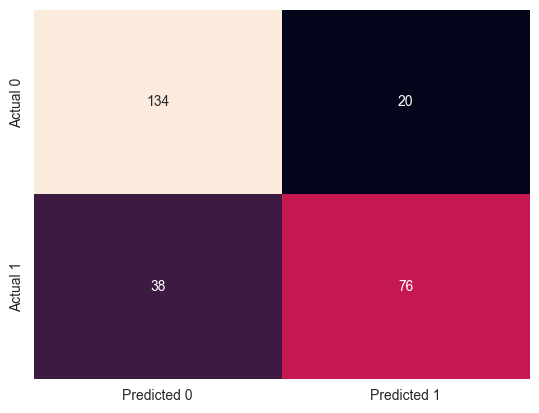

In [127]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=".0f",cbar=False,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])